In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

# RNN 이해하기

RNN의 input, output, weight을 이해해봅시다.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### 문제1-1

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요? 문장의 길이=총 토큰 수 2, 벡터의 크기 10 즉, n_feature=10
- output은 어떤 모양인가요? batch_size = None(지정해 주지 않았기 때문), n_feature=5
- weights 개수는? 80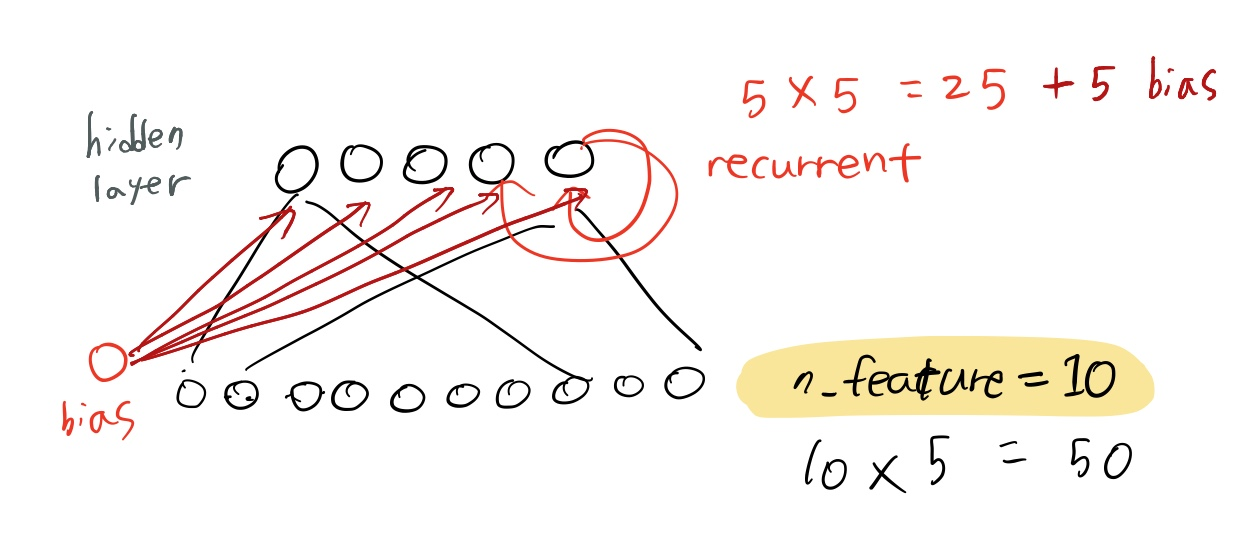

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, input_shape=(2,10))) # timesteps=2, n_feature=10 #5는 심플 rnn 통과한 노드의 개수임.

model.summary()
# Output Shape = batch_size = None, n_feature=5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제1-2

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요? timesteps=2, n_feature=10
- output은 어떤 모양인가요?

return_sequences=True 추가되어 none , 2, 5 로 변경됨. w개수 변경 없음, timesteps=2 값이 outputshape에 출력됨
- weights 개수는? 동일하게 80


In [ ]:
# return_sequences=True 추가되어 none , 2, 5 로 변경됨. w개수 변경 없음
model = Sequential()
model.add(SimpleRNN(5, input_shape=(2,10), return_sequences=True)) # timesteps=2, n_feature=10

model.summary()
# Output Shape = batch_size=None, timesteps=2, n_feature=5

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 5)              80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제 1-3

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요? batch_size=8 문장의 개수 , timesteps=2 문장 길이, 토큰의 수, n_feature=10 벡터의 크기
- output은 어떤 모양인가요? batch_size = 8, n_feature= 5
- weights 개수는? 80 (50 +( b = 5) + recurrent 25 = 80)


In [ ]:
model = Sequential()
model.add(SimpleRNN(5, batch_input_shape=(8,2,10))) # batch_size=8, timesteps=2, n_feature=10
model.summary()
# Output Shape = batch_size=8, n_feature=5 리턴시퀀스 안 줬기떄문에 (8, 5) 두개만 출력, 리턴시퀀스 주면 (8, x, 5) 출력

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 5)                    80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제  1-4

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요? batch_size=8, timesteps=2, n_feature=10
- output은 어떤 모양인가요? batch_size=8, timesteps=2, n_feature= 5
- weights 개수는? 80 즉, timesteps의 수치는 w에 영향을 주지 않는다.


In [ ]:
model = Sequential()

model.add(SimpleRNN(5, batch_input_shape=(8,2,10), return_sequences=True)) # batch_size=8, timesteps=2, n_feature=10
model.summary()
# Output Shape = batch_size=8, timesteps=2, n_feature=5

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 2, 5)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제 1-5

output layer를 추가하겠습니다. 그럼 weights의 개수는? 86개( bias = 6 개 )
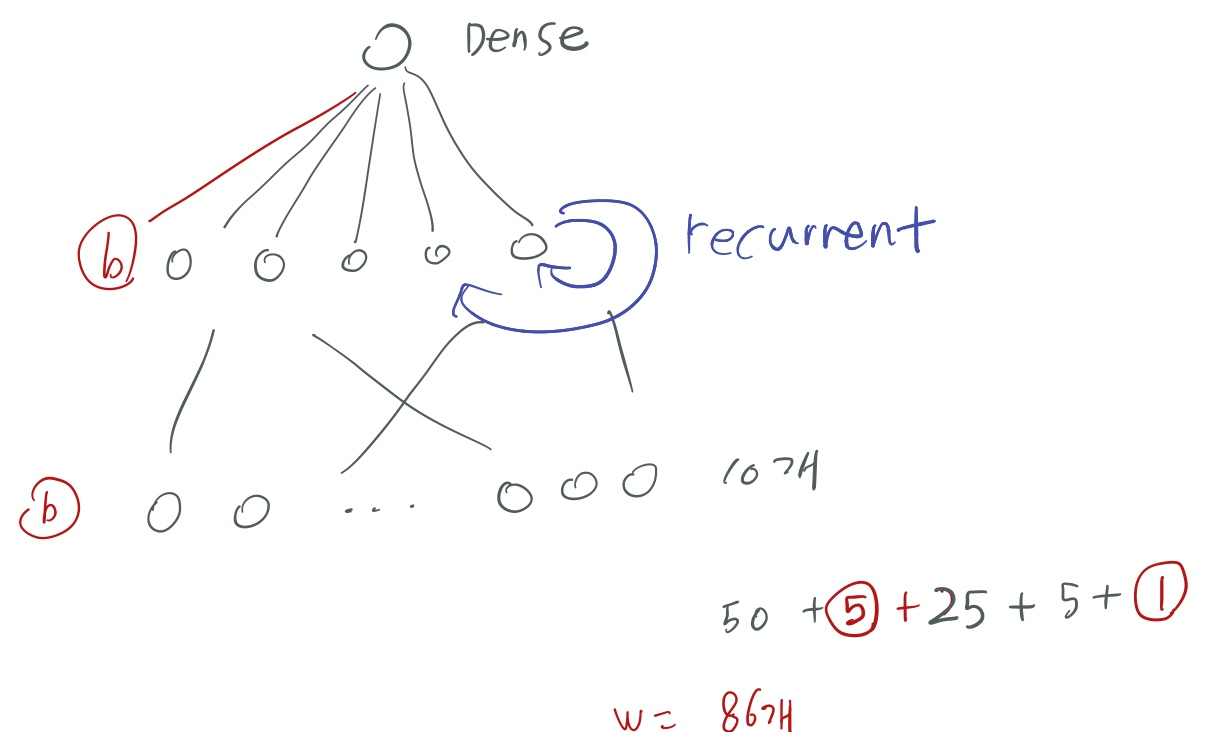

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, input_shape = (2, 10)))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


### 다층 RNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(7, input_shape=(100, 5), return_sequences = True))
model.add(SimpleRNN(3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 7)            91        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3)                 33        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


위의 summary를 보고 직접 계산해보세요

확인 필요

Wx = 35 + 21 + 3 = 59  
Wh = 58

bh = 11

# RNN 구현하기

- Keras RNN : https://keras.io/api/layers/recurrent_layers/simple_rnn/

### 1. 단층 Simple RNN

우선 RNN과 LSTM을 테스트하기 위한 임의의 입력을 만듭니다.

In [ ]:
# 단어 벡터
John = [1,0,0,0]
loves = [0,1,0,0]
cats = [0,0,1,0]
dogs = [0,0,0,1]

In [ ]:
# X 데이터

train_X = np.array([
    [ John, loves, cats ],
    [ John, loves, dogs ]
]).astype(np.float32)

In [ ]:
# 타겟 벡터

S = [0] # subject
V = [1] # verb
O = [2] # object

idx2tag = ['S', 'V', 'O']

In [ ]:
# Y 데이터
train_Y = np.array([[S, V, O], [S, V, O]]).astype(np.float32)

print("train_y", train_Y)
print("train_X의 shape", train_X.shape)
print("train_Y의 shape", train_Y.shape)

train_y [[[0.]
  [1.]
  [2.]]

 [[0.]
  [1.]
  [2.]]]
train_X의 shape (2, 3, 4)
train_Y의 shape (2, 3, 1)


train x shape (배치 2개 , 타임스탬프 3개 토큰수 개, 벡터 4개)

- 단어 벡터의 차원은?
- 문장의 길이는?
- output 클래스 개수는?

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential() #모델 호출
model.add(layers.SimpleRNN(3,
                           input_shape = (3, 4),
                           return_sequences = True,
                           name='SimpleRNN-1')) # RNN 호출


model.add(layers.Dense(3,
                       activation='softmax',
                       name='hidden-to-output')) # 출력을 위한 FFN

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam')
#accuracy, 매트릭스 안 넣었기 때문에 결과 loss만 나옴

In [ ]:
model.fit(train_X, train_Y, epochs= 50) #에폭 50바퀴

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1265
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 1.1234
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 1.1203
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 1.1172
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 1.1140
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 1.1109
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 1.1078
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 1.1046
Epoch 9/50
1/1 [==============================] - 0s 14ms/step - loss: 1.1015
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 1.0984
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 1.0952
Epoch 12/50
1/1 [==============================] - 0s 17ms/step - loss: 1.0921
Epoch 13/50
1/1 [==============================] - 0s 11ms/step

In [6]:
#예측
predictions = model.predict(train_X)

for i, prediction in enumerate(predictions):
    print(prediction)
    print(np.argmax(prediction, axis=1)) #argmax : prediction이 최대가 되게 하는 인덱스를 뽑아라

    result_str = [idx2tag[c] for c in np.argmax(prediction, axis=1) ]  #idx2tag S V D

    print("\tPrediction str: ", "".join(result_str), end = '\n\n\n')

NameError: ignored

결과 해석(3, 3)
1. 예측이 잘 안 됨, v인 확률이 제일 높게 나옴
2. love는 동사일 확률 제일 높음
3. cat은 동사일 확률 제일 높게 나옴


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SimpleRNN-1 (SimpleRNN)     (None, 3, 3)              24        
                                                                 
 hidden-to-output (Dense)    (None, 3, 3)              12        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


실제로 weight의 개수를 확인해봅시다.

In [ ]:
for model_weight in model.weights: #model.weights: 층별로 BIAS W 각각 뽑아줌
    print(model_weight.name, '=>', model_weight.shape)

SimpleRNN-1/simple_rnn_cell_14/kernel:0 => (4, 3)
SimpleRNN-1/simple_rnn_cell_14/recurrent_kernel:0 => (3, 3)
SimpleRNN-1/simple_rnn_cell_14/bias:0 => (3,)
hidden-to-output/kernel:0 => (3, 3)
hidden-to-output/bias:0 => (3,)


**굵은 텍스트**### 2. 다층 Simple RNN

임의의 시계열 데이터를 생성하겠습니다.

In [7]:
import numpy as np

data = np.sin(2*np.pi*np.arange(0, 1000))*10 + np.random.random(1000) #이중 for문으로 돌린다면? for i in range:
data.shape



(1000,)

In [8]:
plt.figure(figsize=[100, 20])
plt.plot(np.arange(0, 1000), data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
from sklearn.model_selection import train_test_split

X, y 데이터 생성하기

다음으로, 해당 샘플 데이터를 1칸씩 이동하며 10개씩 데이터를 잘라, x값으로 사용하고, y값은 11번째 데이터로 사용하겠습니다.  
예) x = 1번째 ~ 10번째 데이터 / y = 11번째

질문) 길이가 1000인 data를 이용해, 몇 쌍의 x, y 데이터를 만들어낼 수 있을까요? 990개, -9 해줘야 함. 첫번째 y가 11 1~10,



In [10]:
# 이중 for문이라면
x_sin = np.array([[[data[i+j]] for j in range(10)] for i in range(len(data)-9-1)])
#[[[data[i+j]]  묶은 이유 [[0],[1],[2],,] 형식으로 묶기 위해
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape

# x = []
# for i in range(990) # len(data) - len(x)
#     for j in range(10) #len(x)
#         x.append(data[i+j]) # x = 0, 1, 2.....9
#             #0 0~9
#             #1 0~9 = 1, 2, 3, ...10
#     data[i+10] # = y , 10 = len(x), 0일때 10, 1일때 9......
#     #편하게 자료구조 생성하기 위해 내포용법 사용함. 규칙을 지닌 원소들로 이루어져 있을 때 규칙적인 자료구조를 생성하고자 할 때 내포용법 써서 한 줄로 표현 가능

#아웃풋 10차원

((990, 10, 1), (990, 1))

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, test_size=0.25, random_state=42)

In [11]:
# shuffle = False로 명시하면, 데이터셋 순차적으로 split
x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, shuffle=False)

In [12]:
x_train.shape, x_test.shape, y_train.shape

((742, 10, 1), (248, 10, 1), (742, 1))

- output
- 742: 이 값은 데이터 샘플의 개수입니다. 즉, 주어진 데이터셋에는 총 742개의 시퀀스 데이터가 있다는 의미입니다.
- 10: 이 값은 시퀀스의 타임스탬프(time step) 개수입니다. 각 시퀀스는 10개의 타임스탬프로 구성되어 있습니다. = 문장의 토큰 수
- 1: 이 값은 각 타임스탬프에서의 피처(feature) 벡터의 길이입니다. 각 시퀀스의 타임스탬프마다 1차원의 피처 값이 있다는 의미입니다.

### 모델 작성.
1. layer1: SimpleRNN 8
2. layer2: SimpleRNN 8
3. layer3: SimpleRNN 4
4. output_layer:  Dense 1 # 값이 하나 ManyToOne

In [14]:
model = models.Sequential()

# 다층 LSTM
model.add(SimpleRNN(8, input_shape = (10, 1), return_sequences = True, name = 'SimpleRNN1'))
model.add(SimpleRNN(8, return_sequences = True, name = 'SimpleRNN2'))
model.add(SimpleRNN(4, return_sequences = True, name = 'SimpleRNN3'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
24/24 [==============================] - 9s 21ms/step - loss: 0.9202
Epoch 2/10
24/24 [==============================] - 0s 12ms/step - loss: 0.2659
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.1557
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.1154
Epoch 5/10
24/24 [==============================] - 1s 21ms/step - loss: 0.1001
Epoch 6/10
24/24 [==============================] - 0s 20ms/step - loss: 0.0929
Epoch 7/10
24/24 [==============================] - 0s 20ms/step - loss: 0.0883
Epoch 8/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0883
Epoch 9/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0843
Epoch 10/10
24/24 [==============================] - 1s 22ms/step - loss: 0.0837


In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SimpleRNN1 (SimpleRNN)      (None, 10, 8)             80        
                                                                 
 SimpleRNN2 (SimpleRNN)      (None, 10, 8)             136       
                                                                 
 SimpleRNN3 (SimpleRNN)      (None, 10, 4)             52        
                                                                 
 dense_1 (Dense)             (None, 10, 1)             5         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


- unit: 노드의 개수 (= 아웃풋 공간의 차원)
- (layer 1) Wx + Wh + b =
- (layer 2) Wx + Wh + b =
- (layer 3) Wx + Wh + b =


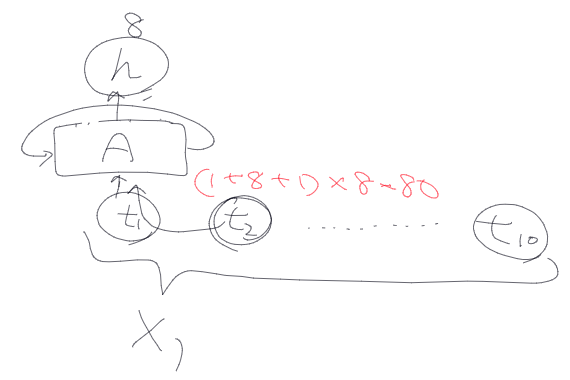

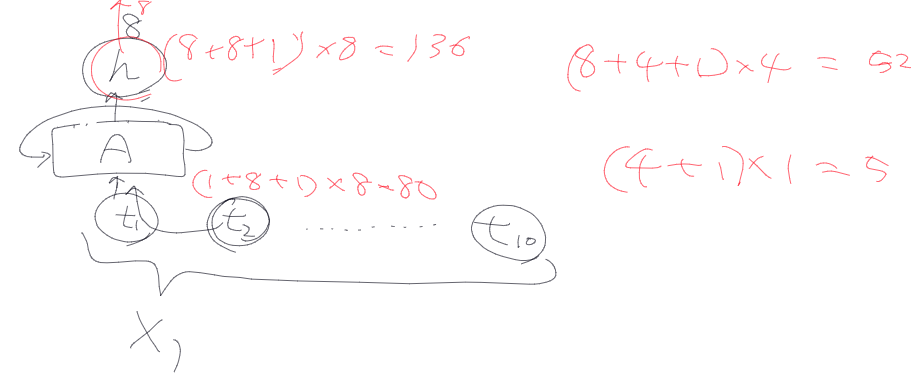

In [16]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)

SimpleRNN1/simple_rnn_cell_6/kernel:0 => (1, 8)
SimpleRNN1/simple_rnn_cell_6/recurrent_kernel:0 => (8, 8)
SimpleRNN1/simple_rnn_cell_6/bias:0 => (8,)
SimpleRNN2/simple_rnn_cell_7/kernel:0 => (8, 8)
SimpleRNN2/simple_rnn_cell_7/recurrent_kernel:0 => (8, 8)
SimpleRNN2/simple_rnn_cell_7/bias:0 => (8,)
SimpleRNN3/simple_rnn_cell_8/kernel:0 => (8, 4)
SimpleRNN3/simple_rnn_cell_8/recurrent_kernel:0 => (4, 4)
SimpleRNN3/simple_rnn_cell_8/bias:0 => (4,)
dense_1/kernel:0 => (4, 1)
dense_1/bias:0 => (1,)


In [17]:
model.weights

[<tf.Variable 'SimpleRNN1/simple_rnn_cell_6/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[-0.06494281,  0.08263697,  0.4483921 ,  0.10973968, -0.04422716,
         -0.6043331 ,  0.04705385,  0.37726998]], dtype=float32)>,
 <tf.Variable 'SimpleRNN1/simple_rnn_cell_6/recurrent_kernel:0' shape=(8, 8) dtype=float32, numpy=
 array([[-0.04258003,  0.32062048, -0.09693465,  0.25580162, -0.70275927,
          0.24174091,  0.50254166,  0.15011322],
        [-0.28155512,  0.13333927, -0.54830575,  0.28350067,  0.30076554,
          0.28280517, -0.09323224,  0.51656145],
        [ 0.5663738 ,  0.01717562,  0.1717188 , -0.358177  ,  0.22901401,
          0.33937082,  0.14389847,  0.5299387 ],
        [-0.57875884, -0.26214328,  0.58130497,  0.17379175,  0.25304523,
          0.04928196,  0.37278193,  0.3063012 ],
        [ 0.36447397, -0.06688458,  0.00674187,  0.34876156,  0.08200055,
         -0.67367697,  0.30098772,  0.3485936 ],
        [ 0.19732405, -0.00835894, -0.1175706 ,  0.29767

##### 학습결과

In [18]:
y_hat = model.predict(x_test) #테스트값 예측

8/8 [==============================] - 0s 4ms/step


In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train)+len(y_hat))

plt.figure(figsize = (100,30))
# Train 데이터 그래프로 표현
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o')
plt.plot(y_2_axis, y_hat.reshape(len(x_test),),'-o', color = 'red', label = 'predicted')
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color = 'purple', alpha = 0.3, label = 'actual')
plt.legend(fontsize = 40)
plt.show()

### reference

- https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/08.%20RNN/8-4.%20understanding_simplernn_and_lstm.ipynb